In [2]:
%pip install numpy pandas scikit-learn matplotlib

  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB 393.8 kB/s eta 0:01:58
   ---------------------------------------- 0.5/46.2 MB 3.1 MB/s eta 0:00:15
   ------------------

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Load data Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Get information and statical on the dataset
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
print(df.info())
print(df.describe())

# Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [7]:
# Initiating and training the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Making forecast on dataset of test
y_pred = knn_model.predict(X_test)

#Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 1.00


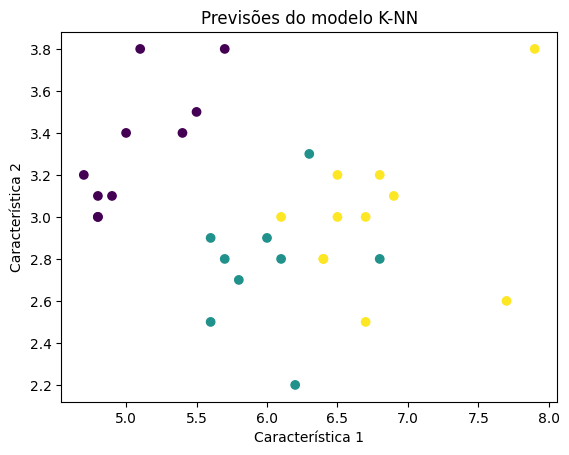

In [8]:
# Viewing predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.title('Previsões do modelo K-NN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()